In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

import warnings
warnings.simplefilter('ignore')

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

### Load data

In [5]:
data = pickle.load(open('X2008_y2008_Xpre2008_ypre2008_Xall_yall_Xval_yval_cv.pkl', 'rb'))

X_2008, y_2008, X_pre2008, y_pre2008, X_all, y_all, X_val, y_val, cv = data

X_test = pickle.load(open('Xtest.pkl', 'rb'))
X_test.shape

for d in data[:-1]:
    print(d.shape)

(1557, 240)
(1557,)
(6633, 240)
(6633,)
(8190, 240)
(8190,)
(518, 240)
(518,)


## DecisionTree

In [11]:
params = {
    #'criterion': ['gini', 'entropy'], 
    'max_depth':[5, 7, 9, 11],
    'min_samples_leaf': [1, 5, 10, 20]
}

tree = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), params, 
                    cv=cv, scoring='roc_auc', verbose=1)


In [12]:
tree.fit(X_all, y_all)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    3.9s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 9, 11], 'min_samples_leaf': [1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [13]:
tree.best_score_, tree.best_params_

(0.93948204995321938, {'max_depth': 7, 'min_samples_leaf': 10})

## Bagging

In [43]:
params = {
    #'n_estimators': [100, 200], 
    #'max_features': [.5, .8, 1.], 
    'max_samples':[1.]
}

bag_grid = GridSearchCV(BaggingClassifier(tree.best_estimator_, n_estimators=200, warm_start=True, 
                                          max_features=.8, random_state=123), 
                        params, cv=cv, scoring='roc_auc', verbose=1)

In [44]:
bag_grid.fit(X_all, y_all)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.3s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
           ... n_estimators=200, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_samples': [1.0]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)

In [45]:
bag_grid.best_score_, bag_grid.best_params_

(0.94904836435554341, {'max_samples': 1.0})

## RandomForest

In [83]:
params = {
    'n_estimators': [100, 1000],
    'max_depth':[17],
    'min_samples_leaf': [1,],
    'max_features': [38,],
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=123, warm_start=True), 
                       params, cv=cv, scoring='roc_auc', verbose=1)

In [84]:
rf_grid.fit(X_all, y_all)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [17], 'min_samples_leaf': [1], 'n_estimators': [100, 1000], 'max_features': [38]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [85]:
rf_grid.best_score_, rf_grid.best_params_

(0.95886494010845913,
 {'max_depth': 17,
  'max_features': 38,
  'min_samples_leaf': 1,
  'n_estimators': 1000})

## ExtratreesClassifier

In [108]:
params = {
    'n_estimators': [100,],
    'bootstrap': [True],
    'criterion': ['entropy'],
    'max_depth': [None,],
    'max_leaf_nodes': [None, ],
    'min_samples_leaf': [1,]
}
extra_tree = GridSearchCV(ExtraTreesClassifier(random_state=123, warm_start=True), params, 
                          cv=cv, scoring='roc_auc', verbose=1)

In [109]:
extra_tree.fit(X_all, y_all)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.2s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'min_samples_leaf': [1], 'bootstrap': [True], 'max_leaf_nodes': [None, 32, 64, 128], 'max_depth': [None], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [110]:
extra_tree.best_score_, extra_tree.best_params_

(0.94542518526761798,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_leaf_nodes': None,
  'min_samples_leaf': 1,
  'n_estimators': 100})

## AdaBoost

In [141]:
params = {
    'learning_rate': [.012,],
    
}
ada_grid = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), 
                                           n_estimators=500, random_state=123),
                       params, cv=cv, scoring='roc_auc', verbose=1)

In [142]:
ada_grid.fit(X_all, y_all)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   47.8s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=123),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.012]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)

In [143]:
ada_grid.best_score_, ada_grid.best_params_

(0.95222059418936211, {'learning_rate': 0.012})

## Gradient Boosting

In [169]:
params = {
    'n_estimators': [500,],
    'learning_rate': [.01, ],
    'max_depth': [7,],
    'max_features': [.5,],
    'subsample': [1.,]
}

grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=123, warm_start=True), params,
                        cv=cv, scoring='roc_auc', verbose=1)

In [170]:
grad_grid.fit(X_all, y_all)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [1.0], 'max_depth': [7], 'learning_rate': [0.01], 'n_estimators': [500], 'max_features': [0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [171]:
grad_grid.best_score_, grad_grid.best_params_

(0.95850884985960938,
 {'learning_rate': 0.01,
  'max_depth': 7,
  'max_features': 0.5,
  'n_estimators': 500,
  'subsample': 1.0})

In [166]:
grad_grid.best_score_, grad_grid.best_params_

(0.95854988703716226,
 {'learning_rate': 0.05,
  'max_depth': 7,
  'max_features': 0.5,
  'n_estimators': 100,
  'subsample': 1.0})

In [148]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [145]:
def plot_roc_auc(models, names, X, y):
    
    plt.figure(figsize=(8, 8))
    for clf, name in zip(models, names):
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:, 1])

        plt.plot(fpr, tpr, alpha=.5, linewidth=3, 
                 label="{}: {:.4f}".format(name, roc_auc_score(y, clf.predict_proba(X)[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='best', title='auc:')

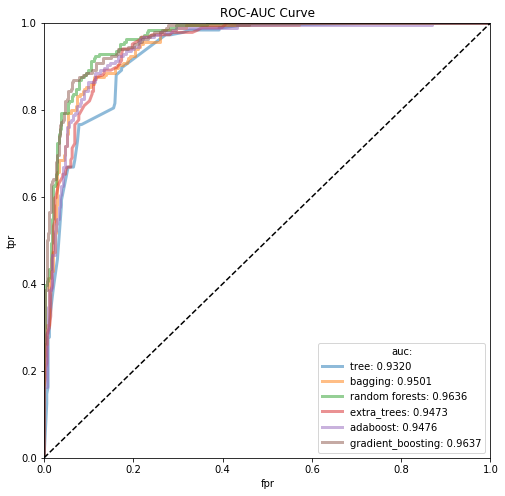

In [172]:
plot_roc_auc([tree, bag_grid, rf_grid, extra_tree, ada_grid, grad_grid], 
             ['tree', 'bagging', 'random forests', 'extra_trees', 'adaboost', 'gradient_boosting'], 
             X_val, y_val)